In [0]:
from google.colab import drive


drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !pip install git+https://github.com/fastai/fastai.git#subdirectory=old
# !pip install torch==1.4.0
!pip install fastai

In [0]:
# import sys


# sys.path.insert(0, "/path/to/fastai/v.0.7")

In [0]:
import numpy as np 
import pandas as pd 

import os


print(os.listdir("/content/gdrive/My Drive/hot-dog-not-hot-dog"))

['seefood', 'train', 'test', 'checkpoints']


In [0]:
from fastai.vision import *


data_dir = "/content/gdrive/My Drive/hot-dog-not-hot-dog/seefood/"
data = ImageDataBunch.from_folder(data_dir, train="train", valid="valid", ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)

os.listdir(data_dir)

['train', 'valid', 'tmp', 'models']

In [0]:
data.classes

['hot_dog', 'not_hot_dog']

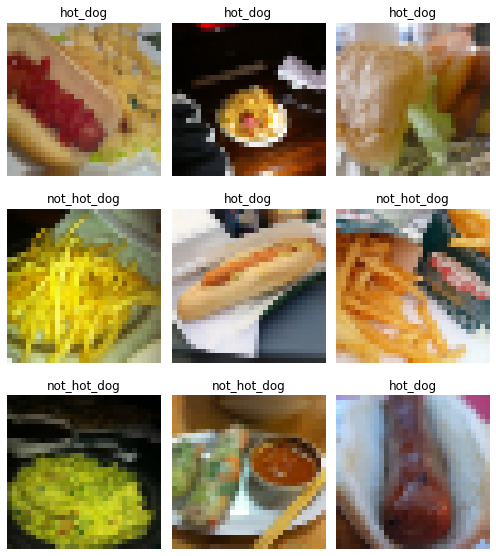

In [0]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
from fastai.metrics import accuracy, KappaScore, AUROC # 1 - accuracy


learn = cnn_learner(data, models.resnet34, metrics=[accuracy, KappaScore(), AUROC()])

In [0]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,kappa_score,auroc,time
0,1.345527,0.852359,0.592157,0.180976,0.615554,00:07
1,1.220603,0.701150,0.676471,0.354232,0.734708,00:06
2,1.130693,0.802558,0.668627,0.340198,0.724631,00:07
3,1.091549,0.876925,0.627451,0.255417,0.680615,00:06
4,1.044791,0.973921,0.650980,0.306599,0.696415,00:06
5,1.013382,0.958360,0.645098,0.294104,0.683231,00:06
6,0.964893,0.889549,0.664706,0.330647,0.672169,00:06
7,0.905613,0.865117,0.652941,0.307055,0.682585,00:07
8,0.861412,0.844654,0.658824,0.318956,0.693985,00:07
9,0.838329,0.834866,0.664706,0.330236,0.696446,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


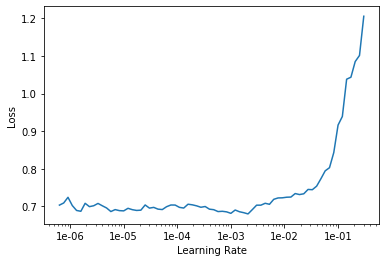

In [0]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-3, 2e-3))

epoch,train_loss,valid_loss,accuracy,kappa_score,auroc,time
0,0.168637,0.639797,0.776471,0.553593,0.844939,00:06
1,0.170602,0.683918,0.774510,0.549919,0.844708,00:06
2,0.163138,0.665418,0.768627,0.537219,0.845092,00:06
3,0.171115,0.724151,0.760784,0.522487,0.845538,00:06
4,0.184501,0.637945,0.766667,0.534050,0.838062,00:06
5,0.172610,0.679268,0.764706,0.529882,0.836415,00:06
6,0.171440,0.724794,0.766667,0.534050,0.840323,00:06
7,0.169151,0.732068,0.770588,0.541881,0.843615,00:06
8,0.166289,0.718947,0.766667,0.534050,0.844415,00:06
9,0.161445,0.714545,0.766667,0.534050,0.844354,00:06


In [0]:
learn.save('hot-dog-fastAI')

In [0]:
learn.load('hot-dog-fastAI')

Learner(data=ImageDataBunch;

Train: LabelList (498 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog
Path: /content/gdrive/My Drive/hot-dog-not-hot-dog/seefood;

Valid: LabelList (510 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog
Path: /content/gdrive/My Drive/hot-dog-not-hot-dog/seefood;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), 

In [0]:
learn.data = data

learn.freeze()

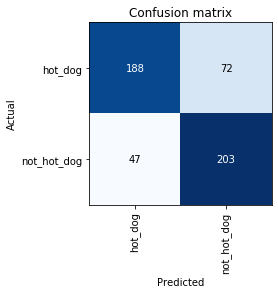

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()